In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('hasy-data-labels.csv')

In [3]:
df.head()

,path,symbol_id,latex,user_id
0,hasy-data/v2-00000.png,31,A,50
1,hasy-data/v2-00001.png,31,A,10
2,hasy-data/v2-00002.png,31,A,43
3,hasy-data/v2-00003.png,31,A,43
4,hasy-data/v2-00004.png,31,A,4435


In [4]:
df = df[(df['symbol_id'] <= 80) & (df['symbol_id'] >= 70)]

In [5]:
df.head()

,path,symbol_id,latex,user_id
345,hasy-data/v2-00345.png,70,0,10
346,hasy-data/v2-00346.png,70,0,31
347,hasy-data/v2-00347.png,70,0,10
348,hasy-data/v2-00348.png,70,0,10
349,hasy-data/v2-00349.png,70,0,10


In [6]:
df.shape

(1020, 4)

In [7]:
import cv2
import numpy as np
df['img_value'] = df.apply(lambda x: cv2.imread(x['path'], 0).flatten(), axis = 1)

In [8]:
df.head()

,path,symbol_id,latex,user_id,img_value
345,hasy-data/v2-00345.png,70,0,10,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
346,hasy-data/v2-00346.png,70,0,31,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
347,hasy-data/v2-00347.png,70,0,10,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
348,hasy-data/v2-00348.png,70,0,10,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
349,hasy-data/v2-00349.png,70,0,10,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."


In [9]:
np.mean(df.img_value.iloc[0])

211.669921875

In [10]:
df.describe?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023BCA0B5D30>,
      dtype=object)

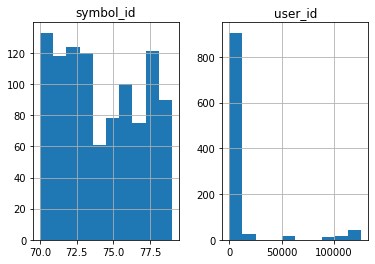

In [11]:
df.hist()

In [12]:
X = np.array(df.img_value.to_list())
Y = df.symbol_id

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [15]:
model.fit(X_train, Y_train) 

C:\Users\VIET\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\VIET\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
Y_pred = model.predict(X_test)

In [17]:
model.score(X_test, Y_test)

0.8823529411764706

In [18]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

          70       0.88      0.94      0.91        16
          71       0.86      0.96      0.91        25
          72       0.93      0.96      0.94        26
          73       0.86      0.93      0.89        27
          74       1.00      1.00      1.00        12
          75       0.72      0.76      0.74        17
          76       0.82      0.82      0.82        17
          77       1.00      1.00      1.00        16
          78       0.95      0.75      0.84        24
          79       0.86      0.75      0.80        24

    accuracy                           0.88       204
   macro avg       0.89      0.89      0.89       204
weighted avg       0.88      0.88      0.88       204



In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(Y_test, Y_pred)

array([[15,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 24,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1, 25,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 25,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 12,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0, 13,  2,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  1, 14,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  1,  1,  1,  0,  2,  1,  0, 18,  0],
       [ 0,  1,  1,  3,  0,  1,  0,  0,  0, 18]], dtype=int64)

In [21]:
Y_train.mode()[0]

70

In [22]:
Y_test

20815    79
372      72
422      77
20087    71
20127    71
346      70
20038    71
20422    75
20729    78
20536    76
20480    75
20494    76
20456    75
20768    79
20346    73
20739    78
20400    74
20174    72
20192    72
20210    72
430      78
420      77
20372    74
448      79
20549    76
20438    75
20078    71
359      71
20286    73
20788    79
         ..
20790    79
20510    76
20688    78
20244    72
20641    78
20221    72
20331    73
20171    72
20060    71
20651    78
20619    77
19953    70
20063    71
20251    73
20303    73
20416    75
20074    71
20393    74
20631    77
19952    70
20633    77
20300    73
20164    72
20533    76
20292    73
20593    77
20539    76
20233    72
20343    73
20337    73
Name: symbol_id, Length: 204, dtype: int64

In [23]:
myY_test = pd.Series(np.repeat(Y_test.mode()[0], Y_test.shape[0], axis = 0), index = Y_test.index)

In [24]:
print(classification_report(Y_test, myY_test))

              precision    recall  f1-score   support

          70       0.00      0.00      0.00        16
          71       0.00      0.00      0.00        25
          72       0.00      0.00      0.00        26
          73       0.13      1.00      0.23        27
          74       0.00      0.00      0.00        12
          75       0.00      0.00      0.00        17
          76       0.00      0.00      0.00        17
          77       0.00      0.00      0.00        16
          78       0.00      0.00      0.00        24
          79       0.00      0.00      0.00        24

    accuracy                           0.13       204
   macro avg       0.01      0.10      0.02       204
weighted avg       0.02      0.13      0.03       204



C:\Users\VIET\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
Y_check = Y_test == Y_pred

In [26]:
Y_check

20815     True
372       True
422       True
20087     True
20127     True
346       True
20038     True
20422     True
20729     True
20536     True
20480    False
20494    False
20456    False
20768     True
20346     True
20739     True
20400     True
20174     True
20192     True
20210     True
430      False
420       True
20372     True
448       True
20549     True
20438     True
20078     True
359       True
20286    False
20788     True
         ...  
20790     True
20510     True
20688     True
20244     True
20641     True
20221     True
20331     True
20171     True
20060     True
20651    False
20619     True
19953     True
20063     True
20251     True
20303     True
20416     True
20074     True
20393     True
20631     True
19952     True
20633     True
20300     True
20164     True
20533     True
20292     True
20593     True
20539     True
20233     True
20343     True
20337     True
Name: symbol_id, Length: 204, dtype: bool

In [27]:
Y_check[Y_check == False]

20480    False
20494    False
20456    False
430      False
20286    False
20047    False
20304    False
20435    False
442      False
20520    False
20744    False
20817    False
20827    False
20175    False
20650    False
20774    False
20823    False
20735    False
19950    False
20771    False
410      False
20640    False
20469    False
20651    False
Name: symbol_id, dtype: bool

In [28]:
df.loc[Y_check[Y_check == False].index[0]]['img_value']

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [29]:
from scipy import misc

In [30]:
wrong = Y_check[Y_check == False].index

In [31]:
img = df.img_value.apply(lambda x: x.reshape([32, 32]))

In [32]:
img_wrong = img.loc[wrong]

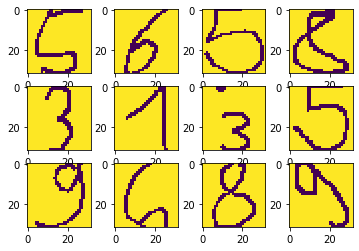

In [33]:
fig, ax = plt.subplots(3, 4)
axn = ax.flatten()
for index, axes in enumerate(axn): 
    axes.imshow(img_wrong.iloc[index])

# Random Forest


In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [36]:
Y_pred = rf.predict(X_test)

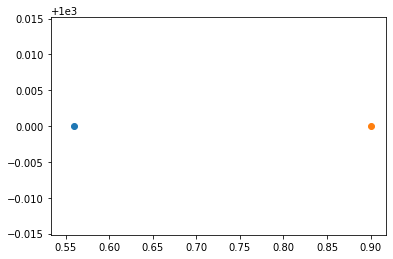

In [37]:
plt.scatter(rf.score(X_test, Y_test),1000)
plt.scatter(0.9,1000)

In [38]:
RandomForestRegressor?

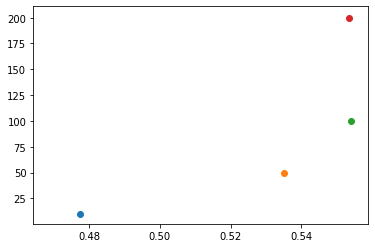

In [39]:
ntrees = np.array([10,50,100,200]) 
for i in ntrees:
    rf = RandomForestRegressor(n_estimators = i, random_state = 0)
    rf.fit(X_train, Y_train)
    plt.scatter(rf.score(X_test, Y_test), i)

# Teapot


In [41]:
from tpot import TPOTClassifier

In [42]:
tpot = TPOTClassifier(generations=8, population_size=50, verbosity=2)
tpot.fit(X_train, Y_train)
print("Accuracy is {}%".format(tpot.score(X_test, Y_test)*100))

Generation 1 - Current best internal CV score: 0.8599412655252067
Generation 2 - Current best internal CV score: 0.8755041862860076
Generation 3 - Current best internal CV score: 0.8755041862860076
Generation 4 - Current best internal CV score: 0.8756247136032332
Generation 5 - Current best internal CV score: 0.8756247136032332
Generation 6 - Current best internal CV score: 0.8756247136032332
Generation 7 - Current best internal CV score: 0.8768163196605059
Generation 8 - Current best internal CV score: 0.8794071671062144

Best pipeline: LinearSVC(OneHotEncoder(MultinomialNB(input_matrix, alpha=0.001, fit_prior=False), minimum_fraction=0.15, sparse=False, threshold=10), C=0.5, dual=True, loss=hinge, penalty=l2, tol=0.001)
Accuracy is 90.19607843137256%
